# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `7` | `Questions`

> Hi, Team. 👋

> The exercise questions ask you to solve three bigger questions. As with our previous exercise problem sets, while answering the questions you will be able to incorporate what you learned in class and consolidate your understanding.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 <font color = "purple"> Bigger Question 1. 

> Here's something that's familiar to you, with a few minor tweaks.

### Please create a predictive model for the weekly return of AMZN stock. You will use supervised learning for your predictive modelling.

> As you learned in class, to do this it is essential to know what factors are related to Amazon’s stock price, and to incorporate as much information as you can into the model.

> Among the three major factors (correlated assets, technical indicators, and fundamental analysis), you will use correlated assets and technical indicators as features here.

    Step 1. Use 75% of your data for the training of your algorithm, and 25% for the testing set.

    Step 2. For your feature engineering...
    
> Our operational definition of `outcome` (`Y`) is the weekly return of Amazon (AMZN). The number of trading days in a week is assumed to be five, and we compute the return using five trading days. 
<br>
    
* <font color = "green"> NOTE: The lagged five-day variables embed the time series component by using a time-delay approach, where the lagged variable is included as one of the predictor variables. This step translates the time series data into a supervised regression-based model framework.
<br>    
    
> For `input features` (`predictors`; `Xs`), we use (The variables used as predictors are as follows) ...

> `Correlated assets`

* lagged five-day returns of stocks (AAPL, MSFT, F);
* currency exchange rates (USD/JPY and GBP/USD);
* indices (S&P 500, Dow Jones, and VIX);
* lagged five-day, 15-day, 30-day, and 60-day returns of AMZN.

> `Technical indicators`

* 21-day, 63-day, and 252-day moving averages;
* 10-day, 30-day, and 200-day exponential moving averages.

    
    Step 3. For your algorithm of choices, please assess the model performance of the following algorithms: 

* Linear Regression
* Elastic Net
* LASSO
* Support Vector Machine
* K-Nearest Neighbor
* ARIMA
* Decision Tree
* Extra Trees 
* Random Forest
* Gradient Boosting Tree
* Adaptive Boosting
    
    
    Step 4. For this exercise, hyperparameter tuning won’t be requested. 
    
    Step 5. But make sure to compare the model performance of the above algorithms.

> The metric for assessing model performance will be mean squared error (`MSE`).
<br>

> Show which of the algorithms perform relatively better by a comparison visualization of performance, for both the training and testing sets learned in class. 

    Step 6. Using the model of your choice, please visualize the actual vs. predicted (estimated) data.

### Below are the lines of code that lead to an answer:

In [3]:
#Before split data, we need to get data
#From step 2, we know what data we need to get

#stocks(AMZN, AAPL, MSFT, F)
#currency exchange rates (USD/JPY and GBP/USD)
#indices (S&P 500, Dow Jones, and VIX)

In [4]:
#get stocks(AMZN, AAPL, MSFT, F)
yf.pdr_override()

stock_tickers = ["AMZN", "AAPL", "MSFT", "F"]
data_stocks = pdr.get_data_yahoo(stock_tickers)

[*********************100%%**********************]  4 of 4 completed


In [5]:
#get currency exchange rates (USD/JPY and GBP/USD)
#Here need to be cautious，"USD/JPY", then you should write "DEXJPUS"
#cuz USD/JPY means 1usd=149.76jpy, DEXJPUS means 1usd=149.76jpy

#This is not working for DEXUSGB we change another one
# currency_tickers = ["DEXJPUS","DEXUSGB"]
# data_currencies = pdr.get_data_fred(currency_tickers)

# currency_tickers = ["USDJPY=X","GBPUSD=X"]
# data_currencies = yf.download(currency_tickers)

#then I figure out...For GBP/USD, ticker should be DEXUSUK
currency_tickers = ["DEXJPUS","DEXUSUK"]
data_currencies = pdr.get_data_fred(currency_tickers)

In [6]:
#get indices (S&P 500, Dow Jones, and VIX)
index_tickers = ["SP500", "DJIA", "VIXCLS"]
data_indices = pdr.get_data_fred(index_tickers)

In [7]:
#now we need to wrangle data before use them
#First get Y weekly return of Amazon (AMZN)
#here is log weekly return of
return_period = 5
Y = (
    np.log(
        data_stocks.loc[ : , ("Adj Close", "AMZN")]
    )
    .diff(return_period)
)

In [8]:
#Then for Xs
#X1 = lagged five-day returns of stocks (AAPL, MSFT, F) 
#From my interpretation is lag five days of five-day returns which is same for the rest
X1 = (
    np.log(
        data_stocks.loc[ : , ("Adj Close", ("AAPL", "MSFT", "F"))]
    )
    .diff(return_period)
    .shift(return_period))

X1.columns = X1.columns.droplevel()
X1.head(1)

,AAPL,MSFT,F
Date,,,
1972-06-01,NaN,NaN,NaN


In [9]:
#currency exchange rates (USD/JPY and GBP/USD)
#I think it's lagged currency exchange rates (USD/JPY and GBP/USD) from Lesson06 what prof roh wrote
X2 = (
    np.log(data_currencies)
    .diff(return_period)
    .shift(return_period)
)

In [10]:
#indices (S&P 500, Dow Jones, and VIX);
#same as before
X3 = (
    np.log(data_indices)
    .diff(return_period)
    .shift(return_period)
)

In [11]:
#lagged five-day, 15-day, 30-day, and 60-day returns of AMZN.
X4 = (
    pd.concat(
        [
            np.log(
                data_stocks.loc[ : ,("Adj Close", "AMZN")]
            )
            .diff(i) for i in [return_period, 
                               return_period*3, 
                               return_period*6, 
                               return_period*12
                              ]
        ], 
        axis=1
    )
    .shift(return_period)
    .dropna()
)

#AMZN_RP15 means amzn 5-day log return lagged 15 days, RP is return period
X4.columns = ["AMZN_RP5","AMZN_RP15","AMZN_RP30","AMZN_RP60"]

In [12]:
#21-day, 63-day, and 252-day moving averages;
#here we assmue the target should choose Y as target
X5 = (
    pd.concat(
        [
            Y
            .rolling(i)
            .mean() 
            for i in [21
                      ,63
                      ,252
                     ]
        ],
        axis=1
    )
)

X5.columns = ["AMZN_SMA21","AMZN_SMA63","AMZN_SMA252"]

In [13]:
#10-day, 30-day, and 200-day exponential moving averages.
X6 = (
    pd.concat(
        [
            Y
            .ewm(i).mean() 
            for i in [10,
                      30,
                      200]
        ],
        axis=1
    )
)

X6.columns = ["AMZN_EMA10","AMZN_EMA30","AMZN_EMA200"]

In [14]:
#concat Y and Xs together, drop all missing values, use weekly data
X = (
    pd.concat(
        [X1,X2,X3,X4,X5,X6],
        axis=1
    )
)

data = (
    pd.concat(
        [Y,X1,X2,X3,X4,X5,X6],
        axis=1
    )
    .dropna()
    .iloc[ : : return_period, : ]
)

In [15]:
#need to make Y and X the same
Y = data.loc[ : , [Y.name]]
X = data.loc[:,X.columns]

In [16]:
#Then we do data split
validation_size = 0.25

train_size = int(len(X)*(1-validation_size))

X_train, X_test = (
    X[:train_size],
    X[train_size:]
)

Y_train, Y_test = (
    Y[:train_size],
    Y[train_size:]
)

In [17]:
#next we fill in the model mentioned in step 3
# Loading Algorithm

from sklearn.linear_model import LinearRegression

# Regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# ENSEMBLE

## Bagging
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Support Vector Machine
from sklearn.svm import SVR

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Multi-layer Perceptron (Neural Networks)
from sklearn.neural_network import MLPRegressor

In [18]:
# for assessment
from sklearn.metrics import mean_squared_error

#for ingore warnings
import warnings
warnings.filterwarnings("ignore")

In [19]:
models = []
#Linear Regression
models.append(("LR", LinearRegression()
             )
            )

#Elastic Net
models.append(("EN", ElasticNet()
             )
            )

#LASSO
models.append(("LASSO", Lasso()
             )
            )

#Support Vector Machine
models.append(("SVR", SVR()
             )
            )

#K-Nearest Neighbor
models.append(("KNN", KNeighborsRegressor()
             )
            )

#ARIMA

#Decision Tree
models.append(("CART", DecisionTreeRegressor()
             )
            )

#Extra Trees
models.append(("ETR", ExtraTreesRegressor()
              )
             )

#Random Forest
models.append(("RFR", RandomForestRegressor()
              )
             )

#Gradient Boosting Tree
models.append(("GBR", GradientBoostingRegressor()
              )
             )

#Adaptive Boosting
models.append(("ABR", AdaBoostRegressor()
              )
             )

In [20]:
train_results = []
test_results = []

names = []

for name, model in models:
    
    names.append(name)
    
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    

  File "E:\software\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "E:\software\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\software\anaconda3\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "E:\software\anaconda3\Lib\subprocess.py", line 1509, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [21]:
#we're not done yet still have ARIMA left
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

modelARIMA =\
(    stats
     .ARIMA(endog = Y_train,
                exog = X_train,
                order = [1, 0, 0]
            )
)

model_fit = modelARIMA.fit()

E:\software\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\software\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\software\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\software\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
train_mse = mean_squared_error(Y_train,model_fit.fittedvalues)

In [23]:
predicted =\
(
    model_fit
    .predict(start = train_size - 1,
             end = len(X) - 1,
             exog = X_test)[1: ]
)

E:\software\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [24]:
test_mse = mean_squared_error(Y_test,predicted)

In [25]:
names.append("ARIMA")
train_results.append(train_mse)
test_results.append(test_mse)

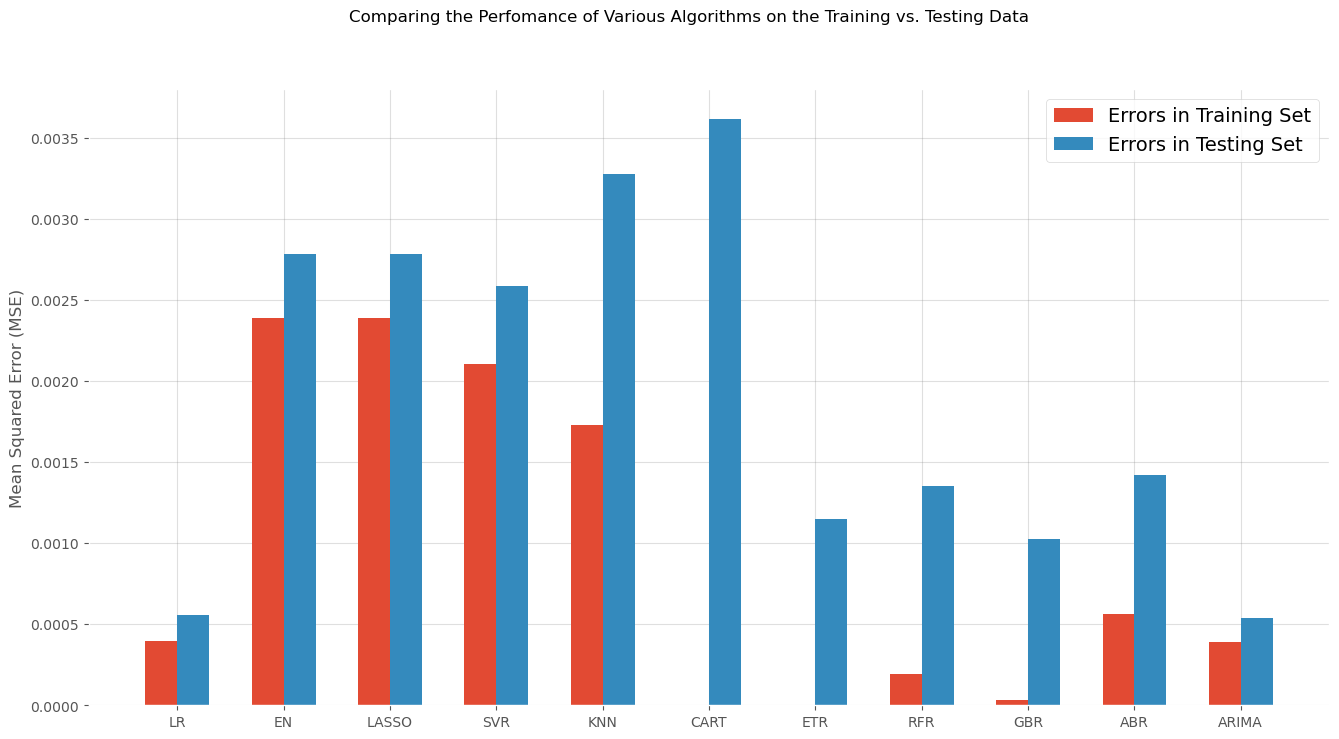

In [26]:
#finally we visualize it
fig = plt.figure(figsize = [16, 8])

ind = np.arange(len(names)
               )

width = 0.30

fig.suptitle("Comparing the Perfomance of Various Algorithms on the Training vs. Testing Data")

ax = fig.add_subplot(111)

(plt
 .bar(ind - width/2,
      train_results,
      width = width,
      label = "Errors in Training Set")
)

(plt
 .bar(ind + width/2,
      test_results,
      width = width,
      label = "Errors in Testing Set")
)

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.ylabel("Mean Squared Error (MSE)")

plt.show()

### <font color = red> Answer 1 is presented in the cell below: </font>

In [27]:
predicted = pd.DataFrame(predicted)
predicted.index = Y_test.index

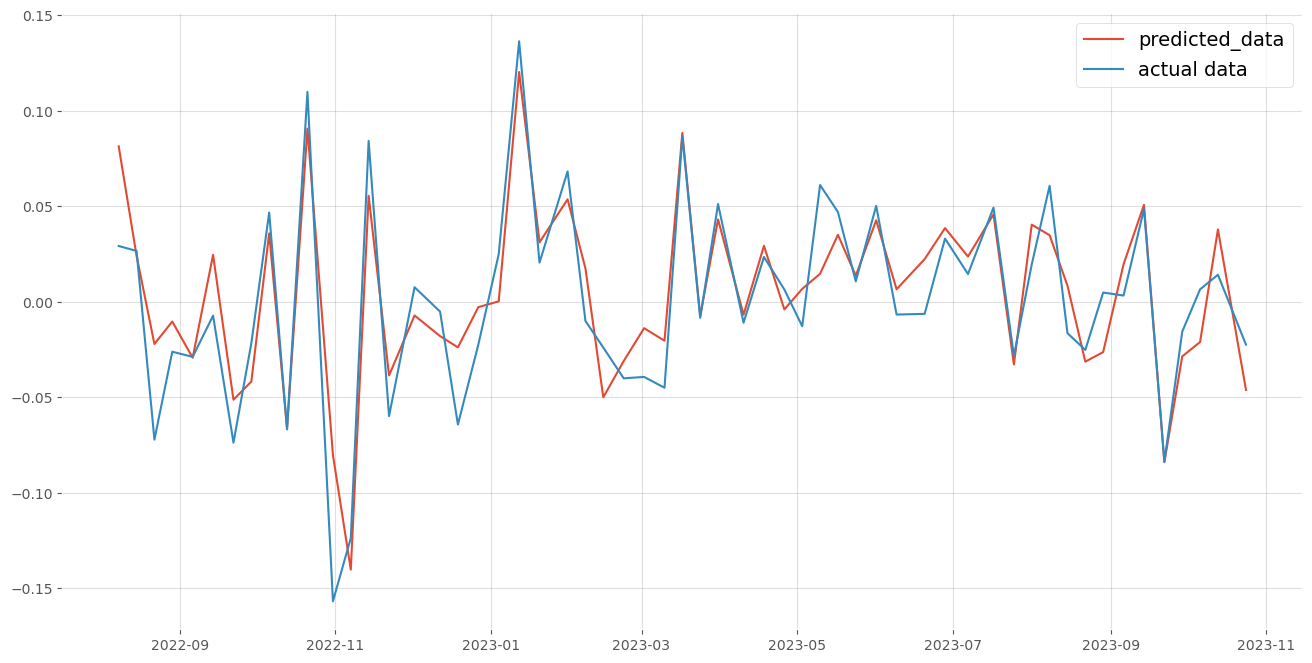

In [28]:
plt.figure(figsize=[16, 8])
plt.plot(predicted, label="predicted_data")
plt.plot(Y_test, label="actual data")

plt.legend()

plt.show()

## <font color = blue> 👉 Questions 2 to 5 ask you to build, execute, and backtest a mean-reversion strategy, using `Relative Strength Index` (`RSI`). </font>

#### The Relative Strength Index (RSI) is an indicator that uses the closing prices of an asset to identify oversold and overbought conditions. 

> Most commonly, RSI is calculated using a 14-day period, and measured on a scale from zero to 100. (It is an oscillator.)

> Traders usually buy an asset when it is oversold (when its RSI is below 30) and sell when it is overbought (when its RSI is above 70). 

> More extreme overbought and oversold levels, such as 80 and 20, are used less frequently, and imply stronger momentum.

#### You are asked to build a trading strategy with the following set of rules.

### <font color = green> NOTE: Apple (`AAPL`) as our security of interest. The `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade.

- You can go long and short.
<br>

- To calculate RSI, use 14 periods (trading days).
<br>

- Enter a long position if RSI crosses the lower threshold (standard value of 30), moving upwards. Exit the position when RSI becomes higher than the middle level (value of 50).
<br>

- Enter a short position if RSI crosses the upper threshold (standard value of 70), moving downwards. Exit the position when RSI becomes less than 50.
<br>

- Only one position can be open at a time.

### <font color = green> NOTE: The RSI is defined as follows:
    
### Calculating the RSI first requires the RS which requires an average value of n-many previous trading days. 
<br>
    
- As discussed, a value of 14 days is common for the RSI calculation. 
<br>
    
- The first RS value requires the price from all 14 of the first trading days. Often, this is a source of confusion with the RSI given successive values only require the most recent. 
   
    
    Step 1. For 14 periods, calculate the difference in price from the current period and the previous period
    
    Step 2. For each period, record each positive change in price as a gain and each negative change as a loss
    
    Step 3. On the 14th period, calculate the arithmetic mean of the gains and losses for the entire 14 day period (e.g. gains / 14 & losses / 14)
    
    Step 4. Use these values to calculate the RS
    
### <center> $ RS = \frac{AverageGain}{AverageLoss} $
    
    Step 5. Use the RS value to calculate the RSI
    
    Step 6. For each proceeding period, use only the previous RSI value to calculate the next average value 
    by multiplying by our lookback period – 1 (e.g., 13 for a lookback of 14).
    
    Step 7. Add the value obtained in Step 6 to the current day’s value (run this for both the gains and losses)
    
### <center> $ RSI = 100 - \frac{100}{1 + RS} $

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [62]:
#first we get the original data
#From 2015 to 2017, the reason get 2014 is to get RSI without missing value in 2015
AAPL = pdr.get_data_yahoo("AAPL", start=dt.datetime(2014,1,1), end=dt.datetime(2018,1,1))[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


In [63]:
#calculate RSI
period = 14

AAPL1 = AAPL.copy()
AAPL1["change"] = AAPL1["Adj Close"].diff()

AAPL1["gain"] = AAPL1["change"].apply(lambda x: x if x > 0 else 0)
AAPL1["loss"] = AAPL1["change"].apply(lambda x: -x if x < 0 else 0)

AAPL1["avg_gain"] = AAPL1["gain"].rolling(period).mean()
AAPL1["avg_loss"] = AAPL1["loss"].rolling(period).mean()

for i in range(14,len(AAPL3)):
#     AAPL3.iloc[i,AAPL3.columns.get_loc("avg_gain")] = (AAPL3.iloc[i-1]["avg_gain"]*13+AAPL3.iloc[i]["gain"])/14
#     AAPL3.iloc[i,AAPL3.columns.get_loc("avg_loss")] = (AAPL3.iloc[i-1]["avg_loss"]*13+AAPL3.iloc[i]["loss"])/14
    AAPL1.iloc[i,4] = (AAPL1.iloc[i-1]["avg_gain"]*13+AAPL1.iloc[i]["gain"])/14
    AAPL1.iloc[i,5] = (AAPL1.iloc[i-1]["avg_loss"]*13+AAPL1.iloc[i]["loss"])/14

AAPL1["RS"] = AAPL1["avg_gain"]/AAPL1["avg_loss"]
AAPL1["RSI"] = 100 - 100/(1+AAPL1["RS"])

In [65]:
#we need to shift RSI 1 cuz it can only be used in next day
AAPL4 = AAPL1.copy()
AAPL4["RSI"] = AAPL4["RSI"].shift(1)
#delete missing value
AAPL4 = AAPL4[["Adj Close", "RSI"]]
#get 2015 to 2017 data
AAPL4 = AAPL4["2015-01-01":]

In [66]:
#set position
AAPL5 = AAPL4.copy()

AAPL5["position"] = np.where(((AAPL5["RSI"]-70)*(AAPL5["RSI"].shift(1)-70)<0)&(AAPL5["RSI"]<70), -1, np.nan)

#alorithm impovement
# AAPL5["position"] = np.where(((AAPL5["RSI"]-70)*(AAPL5["RSI"].shift(1)-70)<0)&(AAPL5["RSI"]>70), 0, AAPL5["position"])
# AAPL5["position"] = np.where(((AAPL5["RSI"]-30)*(AAPL5["RSI"].shift(1)-30)<0)&(AAPL5["RSI"]<30), 0, AAPL5["position"])

AAPL5["position"] = np.where(((AAPL5["RSI"]-30)*(AAPL5["RSI"].shift(1)-30)<0)&(AAPL5["RSI"]>30), 1, AAPL5["position"])
AAPL5["position"] = np.where(((AAPL5["RSI"]-50)*(AAPL5["RSI"].shift(1)-50)<0), 0, AAPL5["position"])
AAPL5["position"] = AAPL5["position"].ffill()
AAPL5["position"] = AAPL5["position"].fillna(0)

#we need to shift our position downward cuz we open position in close price
AAPL5["position"] = AAPL5["position"].shift(1)
AAPL5["position"] = AAPL5["position"].fillna(0)

### <font color = red> Answer 2 is presented in the cell below: </font>

In [ ]:
#now we want to visualize our position
#in order to check we use RSI and position to visualize
AAPL6 = AAPL5.copy()
AAPL6["threshold_1"] = 30
AAPL6["threshold_2"] = 50
AAPL6["threshold_3"] = 70
(
    AAPL6[["RSI", "position", "threshold_1","threshold_2","threshold_3"]]
    .plot(
        secondary_y = "position",
        figsize = [18,9],
        color=["g","b","r","r","r"]
    )
)
plt.show()

In [ ]:
#set buy_or_sell signal
AAPL7 = AAPL5.copy()
AAPL7["buy_or_sell"] = AAPL7["position"].diff(1)
#we need to shift upward same reason as above
AAPL7["buy_or_sell"] = AAPL7["buy_or_sell"].shift(-1)
AAPL7.fillna(0)

In [ ]:
AAPL7.rename(columns={"Adj Close":"Adj_Close"},inplace=True)

In [ ]:
plt.figure(figsize=[19,8])
plt.plot(AAPL7["Adj_Close"], "b")
plt.plot(AAPL7.Adj_Close[AAPL7.buy_or_sell == 1].index, AAPL7.Adj_Close[AAPL7.buy_or_sell == 1], "g^", markersize = 12)
plt.plot(AAPL7.Adj_Close[AAPL7.buy_or_sell == -1].index, AAPL7.Adj_Close[AAPL7.buy_or_sell == -1], "rv", markersize = 12)
plt.show()

### <font color = blue> 👉 Question 3</font>. How much in cumulative returns could you have had as a result of the RSI strategy?

### Below are the lines of code that lead to an answer:

In [ ]:
#first count commision fee
AAPL7["fee"] = 0
AAPL7.fee[AAPL7.buy_or_sell != 0] = 5

#then we get str_return
AAPL7["str_return"] = np.log(AAPL7["Adj_Close"]/AAPL7["Adj_Close"].shift(1))*AAPL7["position"]
AAPL7["str_return"].fillna(0, inplace=True)

#next we put into money
#originate first
AAPL7["money_left"] = 1e5
#calculate
for i in range(len(AAPL7)):
    AAPL7["money_left"][i] = (
        (AAPL7["money_left"][i-1] 
         - 
         AAPL7["fee"][i]
        )
        *
        np.exp(AAPL7["str_return"][i]))
    
AAPL7

In [ ]:
AAPL7["money_left"][-1]/AAPL7["money_left"][0] - 1

### <font color = red> Answer 3 </font>

    The answer is ____-33.38________ % .

### <font color = blue> 👉 Question 4</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

In [ ]:
AAPL8 = AAPL7.copy()
AAPL8["str_log_return"] = np.log(AAPL8["money_left"]/AAPL8["money_left"].shift(1))
AAPL8["cumulative_return"] = np.exp(AAPL8["str_log_return"].cumsum())
AAPL8["max_performance_return"] = AAPL8["cumulative_return"].cummax()
AAPL8.tail()

In [ ]:
#calculate drawdown
AAPL8["drawdown"] = (
    -(
        AAPL8["cumulative_return"]
        -
        AAPL8["max_performance_return"]
    )
    /
    AAPL8["max_performance_return"])

In [ ]:
AAPL_drawdown = (
    pd.concat(
        [
            AAPL8[AAPL8.drawdown==0],# we need to get drawdown == 0
            AAPL8[-1:] #plus last one
        ],
        axis=0
    )
)

lst_day = []
lst_drawdown = []

for i in range(len(AAPL_drawdown) - 1):
    days = (AAPL_drawdown.index[i+1] - AAPL_drawdown.index[i]).days
    max_drawdown = AAPL8[AAPL_drawdown.index[i]:AAPL_drawdown.index[i+1]]["drawdown"].max()
    lst_day.append(days)
    lst_drawdown.append(max_drawdown)

drawdown = pd.DataFrame([lst_day,lst_drawdown]).T
drawdown.columns = ["days", "drawdown"]
drawdown.loc[drawdown["drawdown"].nlargest(5).index]

### <font color = red> Answer 4 </font>

    The Worst drawdown period     : Net drawdown ____39.42________ % | Duration ____865________ Days
    
    The 2nd worst drawdown period : Net drawdown _____6.61_______ % | Duration _____121_______ Days
     
    The 3rd worst drawdown period : Net drawdown _____0.16_______ % | Duration ____13________ Days
         
    The 4th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
    
    The 5th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days

### <font color = blue> 👉 Question 5</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

In [ ]:
lst = []

In [ ]:
year_2015 = AAPL8.loc[dt.datetime(2015,1,1):dt.datetime(2016,1,1)].copy()

lst.append(
    (
        year_2015["money_left"].iloc[-1] 
        -
        year_2015["money_left"].iloc[0]
    )
    /
    year_2015["money_left"].iloc[0])

In [ ]:
year_2016 = AAPL8.loc[dt.datetime(2016,1,1):dt.datetime(2017,1,1)].copy()
lst.append(
    (
        year_2016["money_left"].iloc[-1] 
        -
        year_2016["money_left"].iloc[0]
    )
    /
    year_2016["money_left"].iloc[0])

In [ ]:
year_2017 = AAPL8.loc[dt.datetime(2017,1,1):dt.datetime(2018,1,1)].copy()
lst.append(
    (
        year_2017["money_left"].iloc[-1] 
        -
        year_2017["money_left"].iloc[0]
    )
    /
    year_2017["money_left"].iloc[0])

In [ ]:
lst

In [ ]:
np.mean(lst)

### <font color = red> Answer 5 </font>

    Below average year(s) : ___2017_________ 
    
    Above average year(s) : ___2015,2016_________ 
     

###  <font color = blue> 👉 Question 6. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [ ]:
AAPL8["str_log_return"].fillna(0, inplace=True)

(
    253**0.5
    *
    np.mean(AAPL8["str_log_return"].apply(np.exp)-1)
    /
    np.std(AAPL8["str_log_return"].apply(np.exp)-1)
)

### <font color = red> Answer 6 </font>
    
    Sharpe ratio: ___-0.75_______
    

## 👇 <font color = "purple"> Bigger Question 7. ### 

### This bigger question is where you will execute a principal component analysis (PCA) based portfolio for asset allocation. 
<br>
    
### Go to [the list of SP 500 companies on Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).
    
    Step 1: Among the securities added to the S&P 500 component before January 2000, select the first 30 stocks. 
    
    Step 2: Your objective is to find the portfolio using PCA. Using what you learned in class, 
    identify the profile of each portfolio. 
    
    Step 3: Then backtest the performance of your portfolio, relative to the equal weight portfolio. 
    Here, as you learned in class, use 80% of your data for PCA and 20% for backtesting.
    
### <font color = "green"> NOTE: The investment horizon will be 20 years between 2000 and 2019    

### Below are the lines of code that lead to an answer:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [ ]:
import requests
from bs4 import BeautifulSoup

lst_coms = []
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")

    table = soup.find("table", {"id": "constituents"})

    rows = table.find_all("tr")[1:] 
    companies_before_2000 = []

    for row in rows:
        columns = row.find_all("td")
        if len(columns) >= 4:  
            company_name = columns[0].text.strip()
            join_date = columns[5].text.strip()
            
            if join_date.split("-")[0].isdigit():
                if (int(join_date.split("-")[0])) < 2000:  
                    companies_before_2000.append(company_name)
else:
    print("Failed to retrieve the page. Status code:", response.status_code)

In [ ]:
sp500 = pdr.get_data_yahoo(companies_before_2000[:30], start=dt.datetime(2000,1,1), end=dt.datetime(2020,1,1))

In [ ]:
sp500 = sp500.loc[ : , ("Adj Close")]

In [ ]:
Daily_Linear_Return = sp500.pct_change(1)

In [ ]:
Daily_Linear_Return.head()

In [ ]:
Daily_Linear_Return = (
    Daily_Linear_Return[
        Daily_Linear_Return
        .apply(
            lambda x:(x - x.mean()).abs() < (3 * x.std())
        )
        .all(1)
    ]
)

In [ ]:
scaler = StandardScaler().fit(Daily_Linear_Return)
scaler

In [ ]:
scaled_sp500 =\
(
    pd
    .DataFrame(scaler.fit_transform(Daily_Linear_Return),
               columns = Daily_Linear_Return.columns,
               index = Daily_Linear_Return.index)
)
scaled_sp500.describe()

In [ ]:
prop = int(len(scaled_sp500) * 0.80)

X_Train = scaled_sp500[    : prop] # First 80% of the data
X_Test  = scaled_sp500[prop:     ] # Remaining 20% of the data

X_Train_Raw = Daily_Linear_Return[    :prop]
X_Test_Raw  = Daily_Linear_Return[prop:    ]

In [ ]:
stock_tickers = scaled_sp500.columns.values

stock_tickers

In [ ]:
pca = PCA()
PrincipalComponent = pca.fit(X_Train)

In [ ]:
def PCWeights():

    weights = pd.DataFrame()

    for i in range(len(pca.components_)
                  ):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                  )

    weights = weights.values.T
    return weights 

In [ ]:
weights = PCWeights()

In [ ]:
def calculate_sharpe_ratio(ts_returns, periods_per_year = 252):

    n_years = ts_returns.shape[0] / periods_per_year

    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

In [ ]:
def FindPortfolioVisual():
    
    n_portfolios = len(pca.components_)
    
    annualized_ret = np.array([0.] * n_portfolios)
    
    sharpe_metric = np.array([0.] * n_portfolios)
    
    annualized_vol = np.array([0.] * n_portfolios)
    
    highest_sharpe = 0
    
    stock_tickers = scaled_sp500.columns.values
    
    n_tickers = len(stock_tickers)
    
    PCs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = PCs[i] / sum(PCs[i]
                           )
        
        eigen_prtfi = pd.DataFrame(data = {"weights": pc_w.squeeze()*100}, 
                                   index = stock_tickers)
        
        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)
        
        eigen_prti_returns = np.dot(X_Train_Raw.loc[:, eigen_prtfi.index], 
                                    pc_w)
        
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(),
                                       index = X_Train_Raw.index)
        
        er, vol, sharpe = calculate_sharpe_ratio(eigen_prti_returns)
        
        annualized_ret[i] = er
        
        annualized_vol[i] = vol
        
        sharpe_metric[i] = sharpe
        
        sharpe_metric = np.nan_to_num(sharpe_metric)
        
    # HOW TO FIND A PORTFOLIO with the HIGHEST Sharpe Ratio
    
    highest_sharpe = np.argmax(sharpe_metric)
    
    print("Our Eigen Portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f" %
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100,
           annualized_vol[highest_sharpe]*100,
           sharpe_metric[highest_sharpe]
          )
         )
        
    #####
    
    fig, ax = plt.subplots()
    
    fig.set_size_inches(16, 6)
    
    ax.plot(sharpe_metric, 
            linewidth = 2)
    
    ax.set_title("Sharpe Ratio of Eigen-Portfolios")
    
    ax.set_ylabel("Sharpe Ratio")
    
    ax.set_xlabel("Portfolios")
    
    #####
        
    results = pd.DataFrame(data = {"Return": annualized_ret, "Vol": annualized_vol, "Sharpe": sharpe_metric}
                           )
    
    results.dropna(inplace = True)
    
    results.sort_values(by = ["Sharpe"],
                        ascending = False,
                        inplace = True)
    
    print(results.head(15)
         )
    
    plt.show()

In [ ]:
FindPortfolioVisual()

In [ ]:
# Yet another gift

def backtest_PCA_porfolios(eigen):

    eigen_prtfi =\
        (
            pd
            .DataFrame(data = {"weights": eigen.squeeze()
                              },
                       index = stock_tickers)
        )

    eigen_prtfi.sort_values(by = ["weights"],
                            ascending = False,
                            inplace = True)

    eigen_prtfi_returns =\
    (
        np
        .dot(X_Test_Raw
             .loc[ : , eigen_prtfi.index],
             eigen)
    )

    eigen_portfolio_returns =\
    (
        pd
        .Series(eigen_prtfi_returns.squeeze(),
                index = X_Test_Raw.index)
    )

    returns, vol, sharpe = calculate_sharpe_ratio(eigen_portfolio_returns)

    print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f"  %
          (returns * 100, vol * 100, sharpe)
         )

    # Compared with what? Equal-weightage Portfolio

    equal_weight_return =\
    (
        X_Test_Raw * (1 / len(pca.components_)
                     )
    ).sum(axis = 1)

    df_plot =\
        (
            pd
            .DataFrame({"ML Portfolio Return": eigen_portfolio_returns,
                        "Equal Weight Index": equal_weight_return},
                      index = X_Test.index
                      )
        )

    (
        np
        .cumprod(df_plot + 1)
        .plot(title = "Returns of the equal weighted index vs. Eigen-Portfolio",
              figsize = [16, 8]
             )
    )

    plt.show()

### <font color = red> Answer 7 is presented in the cell below: </font>

In [ ]:
backtest_PCA_porfolios(eigen = weights[28])

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊